Bag of Words: Not used in parctise because of over simplification of the library, necessary for classsroom and presonal projects.

In [1]:
doc="I am high"
doc1="Yes i am high"
doc2="i am kidding"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/krishna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df =pd.read_csv('spam.tsv', sep='\t')

In [4]:
df.head() # length is character length 

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
len(df) # total 5572 message are present in the span and ham dataset

5572

In [8]:
df['label'].value_counts() # this is hihghly skewed and unbalanced dataset

ham     4825
spam     747
Name: label, dtype: int64

#### balance this data

In [17]:
ham=df[df['label']=="ham"]

In [18]:
spam=df[df['label']=="spam"]

In [ ]:
# merege these spam and ham messages using append 

In [19]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [20]:
ham=ham.sample(spam.shape[0])

In [21]:
data= ham.append(spam,ignore_index=True)
#data.head()
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


 # EDA 

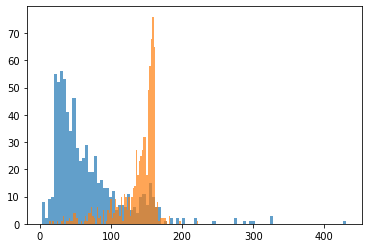

In [23]:
plt.hist(data[data['label']=="ham"]['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=="spam"]['length'],bins=100,alpha=0.7)
plt.show()


#### this is histogram plot for ham messages, indicating chacater length for most of the ham messages are less than 100

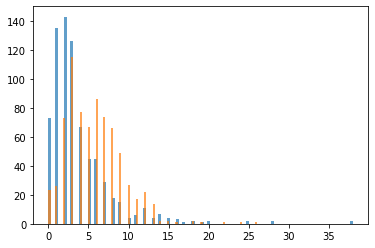

In [24]:
plt.hist(data[data['label']=="ham"]['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=="spam"]['punct'],bins=100,alpha=0.7)
plt.show()


### Data Preparation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=0, shuffle=True,stratify=data['label'])

In [ ]:
### shuffle will make sure to shuffle randomly, stratify makes sure samples are divided correctly according to allotted percentages

In [28]:
# Bag-Of-Words creation
vectorizer=TfidfVectorizer()

In [29]:
X_train = vectorizer.fit_transform(X_train)

In [31]:
X_train.shape

(1045, 3595)

In [ ]:
# vectorizer divides unique words into vocabulary set which is 3595 in this case, stored in a compressed sparse matrix format.
# 1045 is the count of the rows in training dataset

## Pipeline and RF

In [ ]:
# repeat process for training and testing data, pipelining make sure to vectorize the data while classification

In [34]:
clf=Pipeline([('tfid',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators = 100, n_jobs=-1))])
# negative n_jobs specify to use all fo the labels in the dataset.

In [35]:
clf.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [36]:
Y_pred = clf.predict(X_test)

In [37]:
confusion_matrix(Y_test,Y_pred)

array([[224,   1],
       [ 28, 196]])

In [38]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [39]:
accuracy_score(Y_test,Y_pred)

0.9354120267260579

In [43]:
real_msg="Congrats, you won lottery for yourself"
clf.predict([real_msg])

array(['ham'], dtype=object)

## Pipeline with SVM

In [56]:
# repeat process for training and testing data, pipelining make sure to vectorize the data while classification

clf=Pipeline([('tfid',TfidfVectorizer()),('clf',SVC(C=2500,gamma='auto'))])
# C- value which is penalty is set higher for better performance of the model.


In [57]:
clf.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=2500, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_func

In [58]:
Y_pred = clf.predict(X_test)

In [59]:
confusion_matrix(Y_test,Y_pred)

array([[221,   4],
       [ 18, 206]])

In [60]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       225
        spam       0.98      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [61]:
accuracy_score(Y_test,Y_pred)

0.9510022271714922

In [62]:
real_msg="Congrats, you won lottery for yourself"
clf.predict([real_msg])

array(['ham'], dtype=object)